In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 7,4

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Review basic statistics for numeric data:

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Review of basic statistics on categorical data:

In [7]:
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Plotting numerical variables:

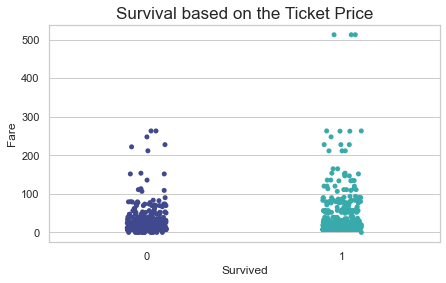

In [8]:
sns.set(style='whitegrid')
sns.stripplot(data=df_train, x='Survived', y='Fare', palette='mako')
plt.title('Survival based on the Ticket Price', fontsize=17)
plt.show()


We can see that people who paid more than 100 funds for the ride were more likely to survive.

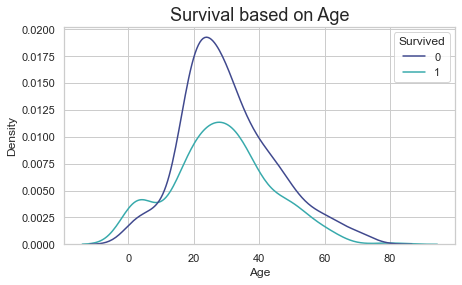

In [9]:
sns.set(style='whitegrid')
sns.kdeplot(data = df_train, x = 'Age', hue = 'Survived', palette='mako')
plt.title('Survival based on Age', fontsize=18)
plt.show()

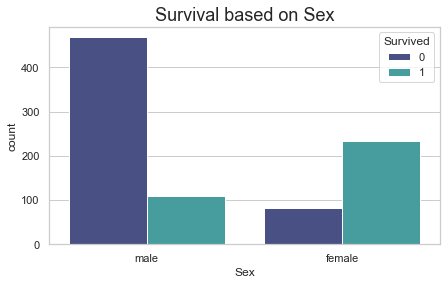

In [10]:
sns.set(style='whitegrid')
a = sns.countplot(x ='Sex', hue = 'Survived', data = df_train, palette='mako')
plt.title('Survival based on Sex', fontsize=18)
plt.show()

Women had a better chance of survival.

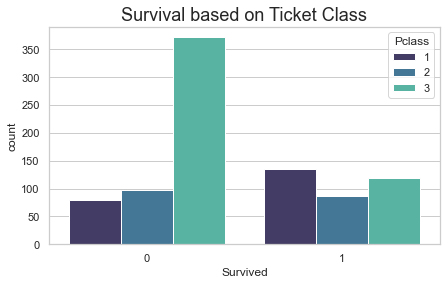

In [11]:
sns.set(style='whitegrid')
sns.countplot(x="Survived", hue="Pclass", data=df_train, palette='mako')
plt.title('Survival based on Ticket Class', fontsize=18)
plt.show()

More survivors had a first-class ticket.

Text(0.5, 1.0, 'Survival probability based on the size of family')

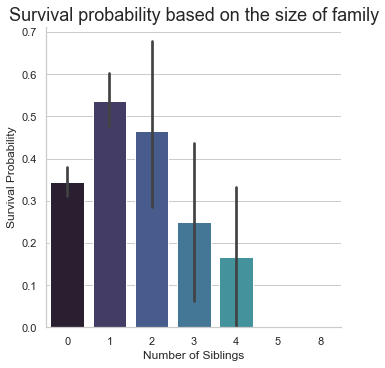

In [12]:
ax = sns.catplot(x = 'SibSp', y = 'Survived', data = df_train, kind = 'bar', palette='mako')
ax.set(xlabel="Number of Siblings", ylabel = "Survival Probability")
plt.title('Survival probability based on the size of family', fontsize=18)

Passengers with one or two siblings or spouses did the best. Passengers with none or more than 3 did worse.<br>

Parch is number of parents or children on board

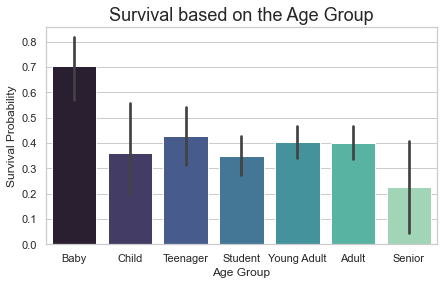

In [13]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df_train['AgeGroup'] = pd.cut(df_train["Age"], bins, labels = labels)

ax=sns.barplot(x="AgeGroup", y="Survived", data=df_train, palette='mako')
ax.set(xlabel="Age Group", ylabel = "Survival Probability")
plt.title('Survival based on the Age Group', fontsize=18)
plt.show()

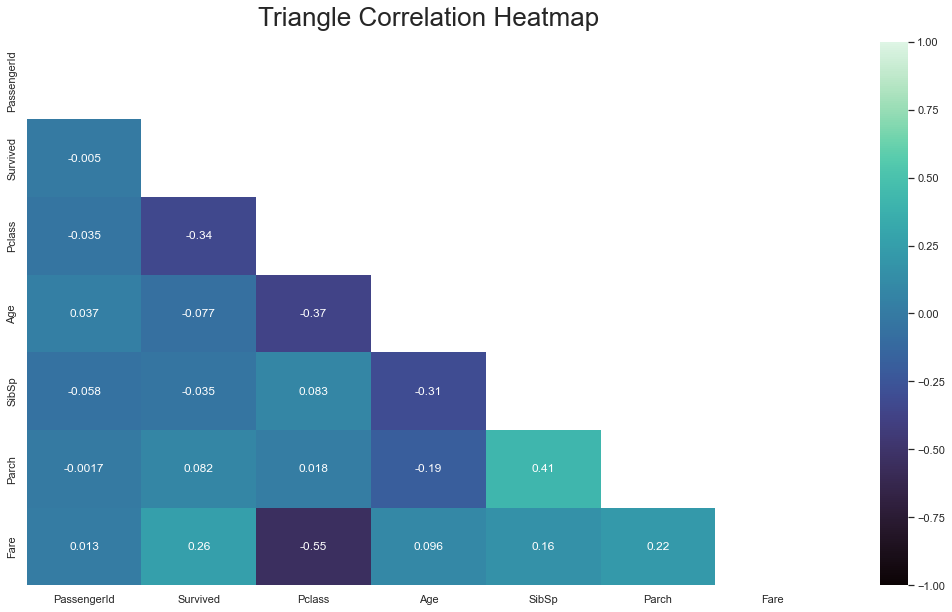

In [14]:
plt.figure(figsize = (18,10))     
mask = np.triu(np.ones_like(df_train.corr(method = "pearson"), dtype=np.bool))
heatmap = sns.heatmap(df_train.corr(),vmin=-1, vmax=1, mask = mask, annot = True, cmap='mako')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':26}, pad=16);

### Missing values

In [15]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64

Before making decision what to do with the missing values (replace, remove, etc) I would like to take a look closer at them and see if any of these features maybe redundand for our analysis.

In [16]:
for val in df_train:
    print(df_train[val].value_counts())
    print()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88,

In [17]:
df = df_train.drop(['Cabin', 'Ticket', 'Name', 'AgeGroup'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


I do not want to remove the rows with missing age due to the fact that the dataset is not large, the sample not big enough in my opinion. I would rather go ahead and replace missing value wiht average age of the passangers. 

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [19]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
df['Age'].mode()

0    24.0
dtype: float64

Text(0.5, 1.0, 'Distribution of Age')

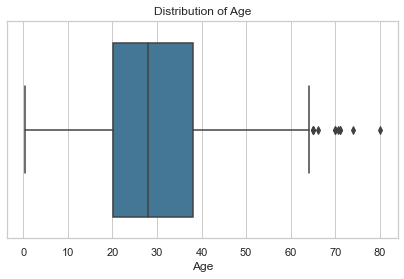

In [21]:
sns.boxplot(df['Age'], palette='mako')
plt.title('Distribution of Age')

I have checked above if the mean and mode are close enough, it looks like the most people on board had age close to the average. Therefore is safe to say that the missing values could be of an age of avg. <br> Therefore I am replacing missing values with mean.<br>
Also removing two observations with missing data in column 'Embarked'.

In [22]:
df = df.fillna(df_train.mean())
df = df.dropna(subset=['Embarked'])

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [24]:
df.shape

(889, 9)

In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [26]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [27]:
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

male      577
female    312
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


To prepare dataset for Machine Learning models we need to change all categorical types to numerical values. 

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()

In [30]:
df.iloc[:, 3] = encoder.fit_transform(df.iloc[:, 3].values)
df.iloc[:, 8] = encoder.fit_transform(df.iloc[:, 8].values)


In [31]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [32]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1]


In [33]:
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

1    577
0    312
Name: Sex, dtype: int64
2    644
0    168
1     77
Name: Embarked, dtype: int64


We can see that we have got number 1 for Male and 0 for Female in the column 'Sex' and for 'Embarked': 2 for S, 0 for C, and 1 for Q.

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [35]:
df.shape

(889, 9)

In [36]:
df=df

In [37]:
df.shape

(889, 9)

### Scaling of data

Re-scalling data into one scale for all features.

In [38]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

In [39]:
X = df.drop(['Survived'], axis=1)
y = df[['Survived']]

In [40]:
print(X.shape)
print(y.shape)

(889, 8)
(889, 1)


In [41]:
X_scaled = s_scaler.fit_transform(X)

In [42]:
print(X_scaled)

[[-1.73250451  0.82520863  0.73534203 ... -0.47432585 -0.50023975
   0.58683958]
 [-1.72861124 -1.57221121 -1.35991138 ... -0.47432585  0.78894661
  -1.93955453]
 [-1.72471797  0.82520863 -1.35991138 ... -0.47432585 -0.48664993
   0.58683958]
 ...
 [ 1.72471797  0.82520863 -1.35991138 ...  2.00611934 -0.17408416
   0.58683958]
 [ 1.72861124 -1.57221121  0.73534203 ... -0.47432585 -0.0422126
  -1.93955453]
 [ 1.73250451  0.82520863  0.73534203 ... -0.47432585 -0.49017322
  -0.67635748]]


In [43]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.head()

,0,1,2,3,4,5,6,7
0,-1.732505,0.825209,0.735342,-0.590495,0.431350,-0.474326,-0.500240,0.586840
1,-1.728611,-1.572211,-1.359911,0.643971,0.431350,-0.474326,0.788947,-1.939555
2,-1.724718,0.825209,-1.359911,-0.281878,-0.475199,-0.474326,-0.486650,0.586840
3,-1.720825,-1.572211,-1.359911,0.412509,0.431350,-0.474326,0.422861,0.586840
4,-1.716931,0.825209,0.735342,0.412509,-0.475199,-0.474326,-0.484133,0.586840


In [44]:
print(X_scaled.shape)
print(y.shape)

(889, 8)
(889, 1)


### Split data into train and test:

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

In [46]:
print('Total number of rows and columns for the complete dataset: ', X_scaled.shape, y.shape)

Total number of rows and columns for the complete dataset:  (889, 8) (889, 1)


In [47]:
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Number of rows and columns after splitting dataset:  (711, 8) (178, 8) (711, 1) (178, 1)


### Building  models with default parameters

#### 1. Logistic Regression 

In [48]:
# loading library and initiating Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)

# Printing out Training and Testing score of the model

print('Training set score for Logistic Regression: {:.4f}'.format(log_mod.score(X_train, y_train)))
print('Test set score for Logistic Regression: {:.4f}'.format(log_mod.score(X_test, y_test)))

Training set score for Logistic Regression: 0.8003
Test set score for Logistic Regression: 0.7697


In [49]:
# generating accuracy, precision, recall and F1 scores

log_mod_y_pred = log_mod.predict(X_test)
    
log_mod_accuracy = metrics.accuracy_score(y_test, log_mod_y_pred)
log_mod_precision = metrics.precision_score(y_test, log_mod_y_pred)
log_mod_recall = metrics.recall_score(y_test, log_mod_y_pred)
log_mod_f1 = metrics.f1_score(y_test, log_mod_y_pred)


In [50]:
# printing out results of Classification Report and summary of Confusion Matrix

print(classification_report(y_test, log_mod_y_pred))
print(metrics.confusion_matrix(y_test, log_mod_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.68      0.77      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178

[[84 25]
 [16 53]]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

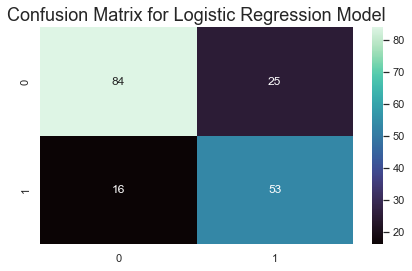

In [51]:
# Visualising Confusion Matrix

cm = confusion_matrix(y_test, log_mod_y_pred)
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion Matrix for Logistic Regression Model', fontsize=18)

#### 2. KNN Neighbors

In [52]:
# loading library and initiating KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_mod = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
knn_mod.fit(X_train, y_train) 

# Printing out training and testing accuracy score

print('Training set score for KNN Neighbors: {:.4f}'.format(knn_mod.score(X_train, y_train)))
print('Test set score for KNN Neighbors: {:.4f}'.format(knn_mod.score(X_test, y_test)))

Training set score for KNN Neighbors: 0.8650
Test set score for KNN Neighbors: 0.7978


In [53]:
# generating accuracy, precision, recall and F1 scores

knn_mod_y_pred = knn_mod.predict(X_test)
    
knn_mod_accuracy = metrics.accuracy_score(y_test, knn_mod_y_pred)
knn_mod_precision = metrics.precision_score(y_test, knn_mod_y_pred)
knn_mod_recall = metrics.recall_score(y_test, knn_mod_y_pred)
knn_mod_f1 = metrics.f1_score(y_test, knn_mod_y_pred)

In [54]:
# printing out Classification Matrix and Confusion matrix

print(classification_report(y_test, knn_mod_y_pred))
print(metrics.confusion_matrix(y_test, knn_mod_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       109
           1       0.73      0.75      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

[[90 19]
 [17 52]]


Text(0.5, 1.0, 'Confusion Matrix for KNN Neighbors Model')

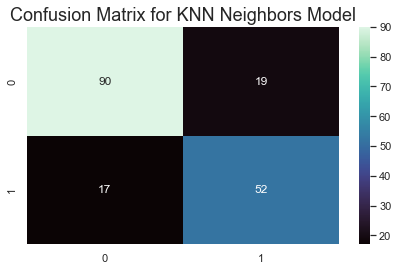

In [55]:
cm = confusion_matrix(y_test, knn_mod_y_pred)
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion Matrix for KNN Neighbors Model', fontsize=18)

#### 3. Supported Vector Machine 

In [56]:
# loading library and initiating SVC Classifier

from sklearn.svm import SVC
svc_mod = SVC(kernel='linear')
svc_mod.fit(X_train, y_train) 

# Printing out training and testing accuracy score

print('Training set score for SVM: {:.4f}'.format(svc_mod.score(X_train, y_train)))
print('Test set score for SVM: {:.4f}'.format(svc_mod.score(X_test, y_test)))

Training set score for SVM: 0.7834
Test set score for SVM: 0.7978


In [57]:
# Generating Accuracy, Precision, Recall and F1 scores

svc_mod_y_pred = svc_mod.predict(X_test)
    
svc_mod_accuracy = metrics.accuracy_score(y_test, svc_mod_y_pred)
svc_mod_precision = metrics.precision_score(y_test, svc_mod_y_pred)
svc_mod_recall = metrics.recall_score(y_test, svc_mod_y_pred)
svc_mod_f1 = metrics.f1_score(y_test, svc_mod_y_pred)

In [58]:
# printing out Classification Matrix and Confusion matrix

print(classification_report(y_test, svc_mod_y_pred))
print(metrics.confusion_matrix(y_test, svc_mod_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

[[89 20]
 [16 53]]


Text(0.5, 1.0, 'Confusion Matrix for Supported Vector Machine Model')

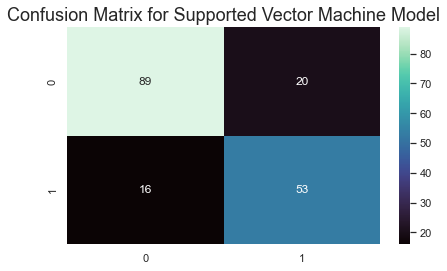

In [59]:
cm = confusion_matrix(y_test, svc_mod_y_pred)
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion Matrix for Supported Vector Machine Model', fontsize=18)

#### 4. Naive Bayes

In [60]:
# loading library and initiating Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
gaus_mod = GaussianNB()
gaus_mod.fit(X_train, y_train)  

# Printing out training and testing accuracy score

print('Training set score for Naive Bayes: {:.4f}'.format(gaus_mod.score(X_train, y_train)))
print('Test set score for Naive Bayes: {:.4f}'.format(gaus_mod.score(X_test, y_test)))

Training set score for Naive Bayes: 0.7975
Test set score for Naive Bayes: 0.7753


In [61]:
# Generating Accuracy, Precision, Recall and F1 scores

gaus_mod_y_pred = gaus_mod.predict(X_test)
    
gaus_mod_accuracy = metrics.accuracy_score(y_test, gaus_mod_y_pred)
gaus_mod_precision = metrics.precision_score(y_test, gaus_mod_y_pred)
gaus_mod_recall = metrics.recall_score(y_test, gaus_mod_y_pred)
gaus_mod_f1 = metrics.f1_score(y_test, gaus_mod_y_pred)

In [62]:
# printing out Classification Matrix and Confusion matrix

print(classification_report(y_test, gaus_mod_y_pred))
print(metrics.confusion_matrix(y_test, gaus_mod_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

[[85 24]
 [16 53]]


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes Model')

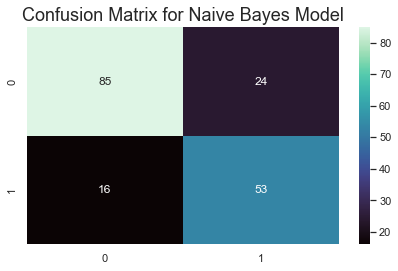

In [63]:
cm = confusion_matrix(y_test, gaus_mod_y_pred)
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion Matrix for Naive Bayes Model', fontsize=18)

#### 5. Decision Tree

In [64]:
# loading library and initiating Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
DT_mod = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_mod.fit(X_train, y_train)

# Printing out training and testing accuracy score

print('Training set score for Decision Tree: {:.4f}'.format(DT_mod.score(X_train, y_train)))
print('Test set score for Decision Tree: {:.4f}'.format(DT_mod.score(X_test, y_test)))

Training set score for Decision Tree: 1.0000
Test set score for Decision Tree: 0.7528


In [65]:
# Generating Accuracy, Precision, Recall and F1 scores

DT_mod_y_pred = DT_mod.predict(X_test)
    
DT_mod_accuracy = metrics.accuracy_score(y_test, DT_mod_y_pred)
DT_mod_precision = metrics.precision_score(y_test, DT_mod_y_pred)
DT_mod_recall = metrics.recall_score(y_test, DT_mod_y_pred)
DT_mod_f1 = metrics.f1_score(y_test, DT_mod_y_pred)

In [66]:
# printing out Classification Matrix and Confusion matrix

print(classification_report(y_test, DT_mod_y_pred))
print(metrics.confusion_matrix(y_test, DT_mod_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       109
           1       0.68      0.70      0.69        69

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178

[[86 23]
 [21 48]]


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Model')

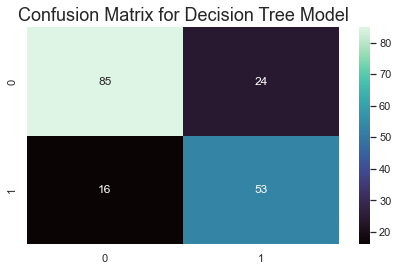

In [67]:
cm = confusion_matrix(y_test, gaus_mod_y_pred)
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion Matrix for Decision Tree Model', fontsize=18)

#### 6. Random Forest

In [68]:
# loading library and initiating Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RF_mod = RandomForestClassifier(n_estimators=8, criterion='entropy', random_state=0)
RF_mod.fit(X_train, y_train)

# Printing out training and testing accuracy score

print('Training set score for Random Fores: {:.4f}'.format(RF_mod.score(X_train, y_train)))
print('Test set score for Random Fores: {:.4f}'.format(RF_mod.score(X_test, y_test)))

Training set score for Random Fores: 0.9761
Test set score for Random Fores: 0.7921


In [69]:
# Generating Accuracy, Precision, Recall and F1 scores

RF_mod_y_pred = RF_mod.predict(X_test)
    
RF_mod_accuracy = metrics.accuracy_score(y_test, RF_mod_y_pred)
RF_mod_precision = metrics.precision_score(y_test, RF_mod_y_pred)
RF_mod_recall = metrics.recall_score(y_test, RF_mod_y_pred)
RF_mod_f1 = metrics.f1_score(y_test, RF_mod_y_pred)

In [70]:
# printing out Classification Matrix and Confusion matrix

print(classification_report(y_test, RF_mod_y_pred))
print(metrics.confusion_matrix(y_test, RF_mod_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       109
           1       0.75      0.70      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178

[[93 16]
 [21 48]]


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

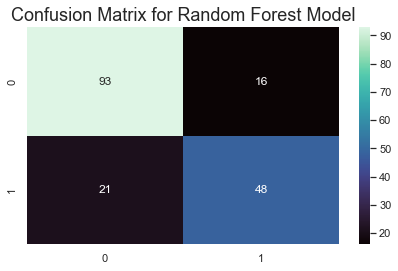

In [71]:
cm = confusion_matrix(y_test, RF_mod_y_pred)
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion Matrix for Random Forest Model', fontsize=18)

### Model comparison:

In [72]:
Model_Comparison = pd.DataFrame({
'Model' : ['Log Reg', 'KNNneighbors', 'SVM', 'Naive Bayes', 'Decision Tree','Random Forest', ],
'Accuracy Score' : [log_mod_accuracy, knn_mod_accuracy, svc_mod_accuracy,
                   gaus_mod_accuracy, DT_mod_accuracy, RF_mod_accuracy],
'Precision' : [log_mod_precision, knn_mod_precision, svc_mod_precision,
              gaus_mod_precision, DT_mod_precision, RF_mod_precision],
'Recall': [log_mod_recall, knn_mod_recall, svc_mod_recall,
          gaus_mod_recall, DT_mod_recall, RF_mod_recall],
'F1 Score': [log_mod_f1, knn_mod_f1, svc_mod_f1,
            gaus_mod_f1, DT_mod_f1, RF_mod_f1]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Accuracy Score,Precision,Recall,F1 Score
0,KNNneighbors,0.797753,0.732394,0.753623,0.742857
1,SVM,0.797753,0.726027,0.768116,0.746479
2,Random Forest,0.792135,0.750000,0.695652,0.721805
3,Naive Bayes,0.775281,0.688312,0.768116,0.726027
4,Log Reg,0.769663,0.679487,0.768116,0.721088
5,Decision Tree,0.752809,0.676056,0.695652,0.685714


<AxesSubplot:ylabel='Model'>

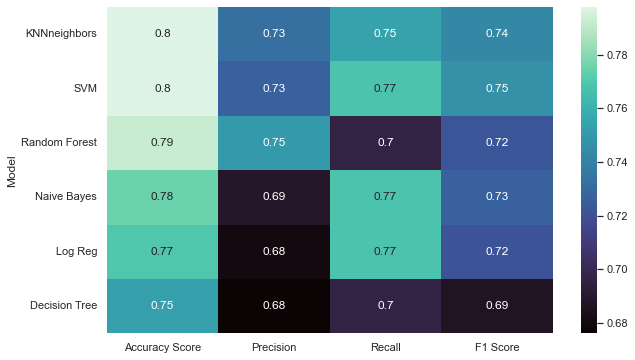

In [73]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(Model_Comparison_df, annot=True, cmap='mako')

### Lets try to tune 4 best performing models:

#### 1. SVM with Tunning

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [75]:
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [0.1, 1, 10, 100, 1000]}]
svc_mod_2 = SVC(kernel="rbf")

In [76]:
svc_grid_search = GridSearchCV(estimator = svc_mod_2, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [77]:
svc_grid_search.fit(X_train, y_train)  

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [78]:
best_score = svc_grid_search.best_score_
best_hyperparams = svc_grid_search.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format
      (best_score, best_hyperparams))

The best test score is 0.8171618104488034 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [79]:
best_params = {"C": 100, "gamma": 0.01, "kernel":"rbf"}
svc_mod_2 = SVC(kernel="rbf")
# model
svc_mod_2 = SVC(C=10, gamma=0.01, kernel="rbf")

svc_mod_2.fit(X_train, y_train.values.ravel())
svc_mod_y_pred_2 = svc_mod_2.predict(X_test)

print('Training set score for SVM tunned: {:.4f}'.format(svc_mod_2.score(X_train, y_train)))
print('Test set score for SVM tunned: {:.4f}'.format(svc_mod_2.score(X_test, y_test)))

Training set score for SVM tunned: 0.8228
Test set score for SVM tunned: 0.8090


In [80]:
svc_mod_2_accuracy = metrics.accuracy_score(y_test, svc_mod_y_pred_2)
svc_mod_2_precision = metrics.precision_score(y_test, svc_mod_y_pred_2)
svc_mod_2_recall = metrics.recall_score(y_test, svc_mod_y_pred_2)
svc_mod_2_f1 = metrics.f1_score(y_test, svc_mod_y_pred_2)

In [81]:
# printing out Classification Matrix and Confusion matrix

print(classification_report(y_test, svc_mod_y_pred_2))
print(metrics.confusion_matrix(y_test, svc_mod_y_pred_2))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.75      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

[[92 17]
 [17 52]]


Text(0.5, 1.0, 'Confusion Matrix for SVM Tunned Model')

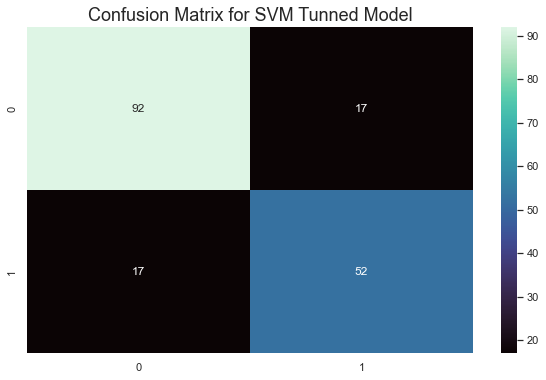

In [82]:
cm = confusion_matrix(y_test, svc_mod_y_pred_2)
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion Matrix for SVM Tunned Model', fontsize=18)

In [83]:
Model_Comparison = pd.DataFrame({
'Model' : ['SVM_1', 'SVM_2'],
'Accuracy Score' : [svc_mod_accuracy, svc_mod_2_accuracy],
'Precision' : [svc_mod_precision, svc_mod_2_precision],
'Recall': [svc_mod_recall, svc_mod_2_recall],
'F1 Score': [svc_mod_f1, svc_mod_2_f1]})


In [84]:
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Accuracy Score,Precision,Recall,F1 Score
0,SVM_2,0.808989,0.753623,0.753623,0.753623
1,SVM_1,0.797753,0.726027,0.768116,0.746479


#### 2. Logistic Regression with tunning

Define parameters:

In [85]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
log_mod_2 = LogisticRegression()

In [86]:
log_reg_grid_search = GridSearchCV(estimator=log_mod_2, 
             param_grid=param_grid_lr, verbose=1, cv=folds, n_jobs=-1)

In [87]:
log_reg_grid_search.fit(X_train, y_train) 

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_iter': [20, 50, 100, 200, 500, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [88]:
best_score = log_reg_grid_search.best_score_
best_hyperparams = log_reg_grid_search.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format
      (best_score, best_hyperparams))

The best test score is 0.7820335809052243 corresponding to hyperparameters {'class_weight': 'balanced', 'max_iter': 20, 'solver': 'newton-cg'}


In [89]:
best_params = {'class_weight': 'balanced', 'max_iter': 20,  'solver': 'newton-cg'}

# model
log_mod_2 = LogisticRegression(class_weight= 'balanced', max_iter= 20,  solver= 'newton-cg')

log_mod_2.fit(X_train, y_train.values.ravel())
log_mod_y_pred_2 = log_mod_2.predict(X_test)

print('Training set score for Logistic Regression tunned: {:.4f}'.format(log_mod_2.score(X_train, y_train)))
print('Test set score for Logistic Regression tunned: {:.4f}'.format(log_mod_2.score(X_test, y_test)))

Training set score for Logistic Regression tunned: 0.7904
Test set score for Logistic Regression tunned: 0.7809


In [90]:
log_mod_2_accuracy = metrics.accuracy_score(y_test, log_mod_y_pred_2)
log_mod_2_precision = metrics.precision_score(y_test, log_mod_y_pred_2)
log_mod_2_recall = metrics.recall_score(y_test, log_mod_y_pred_2)
log_mod_2_f1 = metrics.f1_score(y_test, log_mod_y_pred_2)

In [91]:
# printing out Classification Matrix and Confusion matrix

print(classification_report(y_test, log_mod_y_pred_2))
print(metrics.confusion_matrix(y_test, log_mod_y_pred_2))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       109
           1       0.68      0.83      0.75        69

    accuracy                           0.78       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.78      0.78       178

[[82 27]
 [12 57]]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Tunned Model')

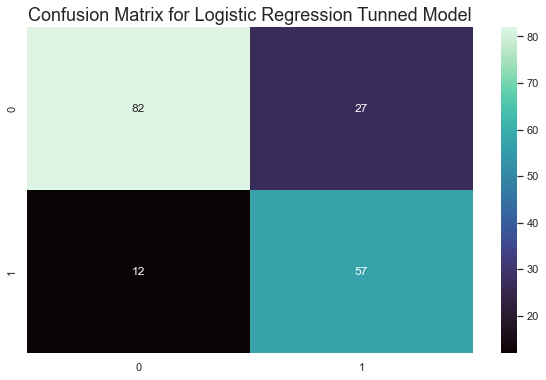

In [92]:
cm = confusion_matrix(y_test, log_mod_y_pred_2)
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion Matrix for Logistic Regression Tunned Model', fontsize=18)

In [93]:
Model_Comparison = pd.DataFrame({
'Model' : ['Log_Reg', 'Log_Reg_2'],
'Accuracy Score' : [log_mod_accuracy, log_mod_2_accuracy],
'Precision' : [log_mod_precision, log_mod_2_precision],
'Recall': [log_mod_recall, log_mod_2_recall],
'F1 Score': [log_mod_f1, log_mod_2_f1]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Accuracy Score,Precision,Recall,F1 Score
0,Log_Reg_2,0.780899,0.678571,0.826087,0.745098
1,Log_Reg,0.769663,0.679487,0.768116,0.721088


#### 3. Random Forest Tunned

Define parameters:

In [94]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]
}
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
RF_mod_2 = RandomForestClassifier()

In [95]:
rf_reg_tuned = GridSearchCV(estimator=RF_mod_2,
                            param_grid=param_grid,
                            cv=folds,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': [6, 8, 10, 12, 14, 16],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [96]:
best_score = rf_reg_tuned.best_score_
best_hyperparams = rf_reg_tuned.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format
      (best_score, best_hyperparams))

The best test score is 0.8368485367866438 corresponding to hyperparameters {'max_depth': 10, 'max_features': 6, 'n_estimators': 300}


In [97]:
best_params = {'max_depth': 10, 'max_features': 6, 'n_estimators': 100}

# model
RF_mod_2 = RandomForestClassifier(max_depth= 10, max_features= 6,  n_estimators= 100)

RF_mod_2.fit(X_train, y_train.values.ravel())
RF_mod_y_pred_2 = RF_mod_2.predict(X_test)

print('Training set score for Random Forest tunned: {:.4f}'.format(RF_mod_2.score(X_train, y_train)))
print('Test set score for Random Forest tunned: {:.4f}'.format(RF_mod_2.score(X_test, y_test)))

Training set score for Random Forest tunned: 0.9648
Test set score for Random Forest tunned: 0.7978


In [98]:
RF_mod_2_accuracy = metrics.accuracy_score(y_test, RF_mod_y_pred_2)
RF_mod_2_precision = metrics.precision_score(y_test, RF_mod_y_pred_2)
RF_mod_2_recall = metrics.recall_score(y_test, RF_mod_y_pred_2)
RF_mod_2_f1 = metrics.f1_score(y_test, RF_mod_y_pred_2)


In [99]:
# printing out Classification Matrix and Confusion matrix

print(classification_report(y_test, RF_mod_y_pred_2))
print(metrics.confusion_matrix(y_test, RF_mod_y_pred_2))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178

[[92 17]
 [19 50]]


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Tunned Model')

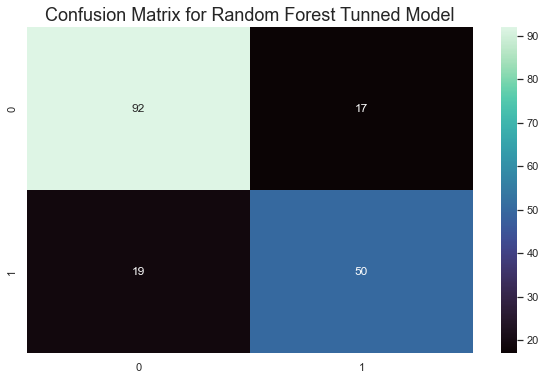

In [100]:
cm = confusion_matrix(y_test, RF_mod_y_pred_2)
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion Matrix for Random Forest Tunned Model', fontsize=18)

In [101]:
Model_Comparison = pd.DataFrame({
'Model' : ['RF_Reg', 'RF_Reg_2'],
'Accuracy Score' : [RF_mod_accuracy, RF_mod_2_accuracy],
'Precision' : [RF_mod_precision, RF_mod_2_precision],
'Recall': [RF_mod_recall, RF_mod_2_recall],
'F1 Score': [RF_mod_f1, RF_mod_2_f1]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Accuracy Score,Precision,Recall,F1 Score
0,RF_Reg_2,0.797753,0.746269,0.724638,0.735294
1,RF_Reg,0.792135,0.750000,0.695652,0.721805


#### 4.  KNN neighbors tunned

Defining parameters;

In [102]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

param_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
KNN_mod_2 = KNeighborsClassifier()

In [103]:
KNN_tuned = GridSearchCV(estimator=KNN_mod_2,
                            param_grid=param_grid,
                            cv=folds,
                            n_jobs=-1,
                            verbose=2)

KNN_tuned.fit(X_train, y_train)

Fitting 4 folds for each of 2842 candidates, totalling 11368 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             verbose=2)

In [104]:
best_score = KNN_tuned.best_score_
best_hyperparams = KNN_tuned.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format
      (best_score, best_hyperparams))

The best test score is 0.8354440424046213 corresponding to hyperparameters {'leaf_size': 1, 'n_neighbors': 9, 'p': 1}


In [105]:
best_params = {'leaf_size': 1, 'n_neighbors': 10, 'p': 1}

# model
KNN_mod_2 = KNeighborsClassifier(leaf_size= 1, n_neighbors= 10,  p= 1)

KNN_mod_2.fit(X_train, y_train.values.ravel())
KNN_mod_y_pred_2 = KNN_mod_2.predict(X_test)

print('Training set score for KNN Neighbors tunned: {:.4f}'.format(KNN_mod_2.score(X_train, y_train)))
print('Test set score for KNN Neighbors tunned: {:.4f}'.format(KNN_mod_2.score(X_test, y_test)))

Training set score for KNN Neighbors tunned: 0.8523
Test set score for KNN Neighbors tunned: 0.7865


In [106]:
KNN_mod_2_accuracy = metrics.accuracy_score(y_test, KNN_mod_y_pred_2)
KNN_mod_2_precision = metrics.precision_score(y_test, KNN_mod_y_pred_2)
KNN_mod_2_recall = metrics.recall_score(y_test, KNN_mod_y_pred_2)
KNN_mod_2_f1 = metrics.f1_score(y_test, KNN_mod_y_pred_2)

In [107]:
# printing out Classification Matrix and Confusion matrix

print(classification_report(y_test, KNN_mod_y_pred_2))
print(metrics.confusion_matrix(y_test, KNN_mod_y_pred_2))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.74      0.70      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.79       178

[[92 17]
 [21 48]]


Text(0.5, 1.0, 'Confusion Matrix for KNN Neighbors Tunned Model')

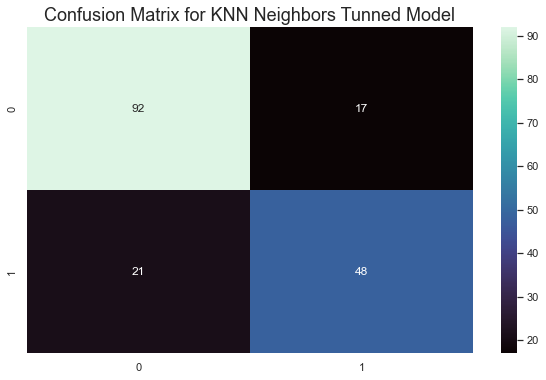

In [108]:
cm = confusion_matrix(y_test, KNN_mod_y_pred_2)
colors = ["#bdbdbd", "#636363"]
sns.set_palette(sns.color_palette(colors))
sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion Matrix for KNN Neighbors Tunned Model', fontsize=18)

In [109]:
Model_Comparison = pd.DataFrame({
'Model' : ['KNN', 'KNN_2'],
'Accuracy Score' : [knn_mod_accuracy, KNN_mod_2_accuracy],
'Precision' : [knn_mod_precision, KNN_mod_2_precision],
'Recall': [knn_mod_recall, KNN_mod_2_recall],
'F1 Score': [knn_mod_f1, KNN_mod_2_f1]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Accuracy Score,Precision,Recall,F1 Score
0,KNN,0.797753,0.732394,0.753623,0.742857
1,KNN_2,0.786517,0.738462,0.695652,0.716418


### All models comparison:

In [110]:
Model_Comparison = pd.DataFrame({
'Model' : ['Log Reg', 'KNNneighbors', 'SVM', 'Naive Bayes', 'Decision Tree','Random Forest',
          'Log Reg Tunned', 'KNN Tunned', 'SVM Tunned', 'Random Forest Tunned'],
'Accuracy Score' : [log_mod_accuracy, knn_mod_accuracy, svc_mod_accuracy,
                   gaus_mod_accuracy, DT_mod_accuracy, RF_mod_accuracy, log_mod_2_accuracy, 
                    KNN_mod_2_accuracy, svc_mod_2_accuracy, RF_mod_2_accuracy],
'Precision' : [log_mod_precision, knn_mod_precision, svc_mod_precision,
              gaus_mod_precision, DT_mod_precision, RF_mod_precision,
              log_mod_2_precision, KNN_mod_2_precision, svc_mod_2_precision, RF_mod_2_precision],
'Recall': [log_mod_recall, knn_mod_recall, svc_mod_recall,
          gaus_mod_recall, DT_mod_recall, RF_mod_recall,
          log_mod_recall, KNN_mod_2_recall, svc_mod_2_recall, RF_mod_2_recall],
'F1 Score': [log_mod_f1, knn_mod_f1, svc_mod_f1,
            gaus_mod_f1, DT_mod_f1, RF_mod_f1,
            log_mod_2_f1, KNN_mod_2_f1, svc_mod_2_f1, RF_mod_2_f1]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Accuracy Score,Precision,Recall,F1 Score
0,SVM Tunned,0.808989,0.753623,0.753623,0.753623
1,KNNneighbors,0.797753,0.732394,0.753623,0.742857
2,SVM,0.797753,0.726027,0.768116,0.746479
3,Random Forest Tunned,0.797753,0.746269,0.724638,0.735294
4,Random Forest,0.792135,0.750000,0.695652,0.721805
5,KNN Tunned,0.786517,0.738462,0.695652,0.716418
6,Log Reg Tunned,0.780899,0.678571,0.768116,0.745098
7,Naive Bayes,0.775281,0.688312,0.768116,0.726027
8,Log Reg,0.769663,0.679487,0.768116,0.721088
9,Decision Tree,0.752809,0.676056,0.695652,0.685714


<AxesSubplot:ylabel='Model'>

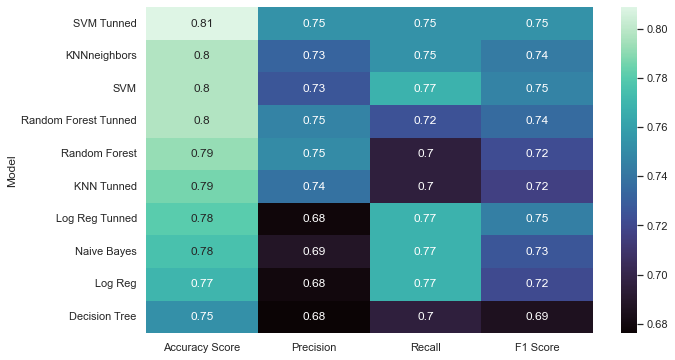

In [111]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(Model_Comparison_df, annot=True, cmap='mako')

In [112]:
y = df_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
